![alt text](images/HDAT9500Banner.PNG)
<br>

# Final Assignment

## Phillip Hungerford z5037298

![alt text](images/ML-work-flow.PNG)
<br>

In [1]:
import ipywidgets as widgets
from IPython.display import HTML

**Honour Pledge** <p>
Declaration: <p>
    
    
**1**: I declare that this assessment item is my own work, except where acknowledged, and has not been submitted for academic credit elsewhere or previously, or produced independently of this course (e.g. for a third party such as your place of employment) and acknowledge that the assessor of this item may, for the purpose of assessing this item: 
    a. Reproduce this assessment item and provide a copy to another member of the University; and/or 
    b. Communicate a copy of this assessment item to a plagiarism checking service (which may then retain a copy of the assessment item on its database for the purpose of future plagiarism checking). 

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Please check the next boxes if you agree with the statement above. Do the same for the next statements.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
widgets.Checkbox(
    value=True,
    description='I understand and agree',
    disabled=True
)

Checkbox(value=True, description='I understand and agree', disabled=True)

**2**: I certify that I have read and understood the University Rules in respect of Student Academic Misconduct. 

In [3]:
widgets.Checkbox(
    value=True,
    description='I understand and agree',
    disabled=True
)

Checkbox(value=True, description='I understand and agree', disabled=True)

**3**: I have a backup copy of the assessment.

In [4]:

widgets.Checkbox(
    value=True,
    description='I understand and agree',
    disabled=True
)

Checkbox(value=True, description='I understand and agree', disabled=True)

***

# Instructions

Parts 1-4 are completed in order and parts 5-11 are completed within each model presented.

**Task**: The task is to build a predictive algorithm using the techniques we learned in this course.

**Objective**: To assess the role of machine learning‐based automated software for forecasting diabetes mellitus (DM) by using 8 variables that have been found to be significant risk factors for diabetes among Pimas and other populations.

**Question**: Forecast whether a patient will develop diabetes based on 8 variables/risk factors.

**Deadline**: 31st of October 23.59pm.

**Our hypothesis is that Machine Learning algorithms could learn to forecast whether a given individual would develop diabetes mellitus within five years given the value of the eight input variables.**

## Data dictionary
| Variable | Description | Format | Allowable Entries |
|---|---|---|---|
|`Pregnancies` | Number of times pregnant | number |  |
|`Glucose` | Plasma Glucose Concentration at 2 Hours in an Oral Glucose Tolerance Test (GTIT)| number |  |
|`BloodPressure` | Diastolic Blood Pressure (mmHg)| number |  |
|`SkinThickness` | Triceps Skin Fold Thickness (mm) | number |  |
|`Insulin` | 2-Hour Serum Insulin (Uh/ml) | number |  |
|`BMI` | Body Mass Index (Weight in kg/(Height in inches)) | number | |
|`DiabetesPedigreeFunction` | Diabetes Pedigree Function | number |  |
|`Age` | Age (years) | number |  |
|`Outcome` | Has diabetes mellitus or not | number | 0 = does not have diabetes mellitus 1 = has diabetes mellitus|

**Remove warnings.**

In [5]:
import warnings
warnings.filterwarnings("ignore")

**Set a seed for reproducibility.**

In [6]:
seeds=61
from numpy.random import seed
import random
random.seed(seeds)
seed(seeds)

from tensorflow import set_random_seed
set_random_seed(1)

## Load data.

In [7]:
import pandas as pd
import numpy as np
diabetes = pd.read_csv("data/diabetes.csv")

## Feature Characteristics

First, we will check if all predictors are in our dataset and have been loaded correctly.

In [8]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Great, looks like all of the features and the outcome are present as per the data dictionary. But notice there are some 0 values in skin thickness and insulin (noted for cleaning). Now we will visualise the features. 

In [9]:
diabetes.hist(figsize=(10,8), bins=10)
diabetes.plot

We can also visualise the data with the outcome (diabetes) as a fill to see any differences between those with and those without diabetes.

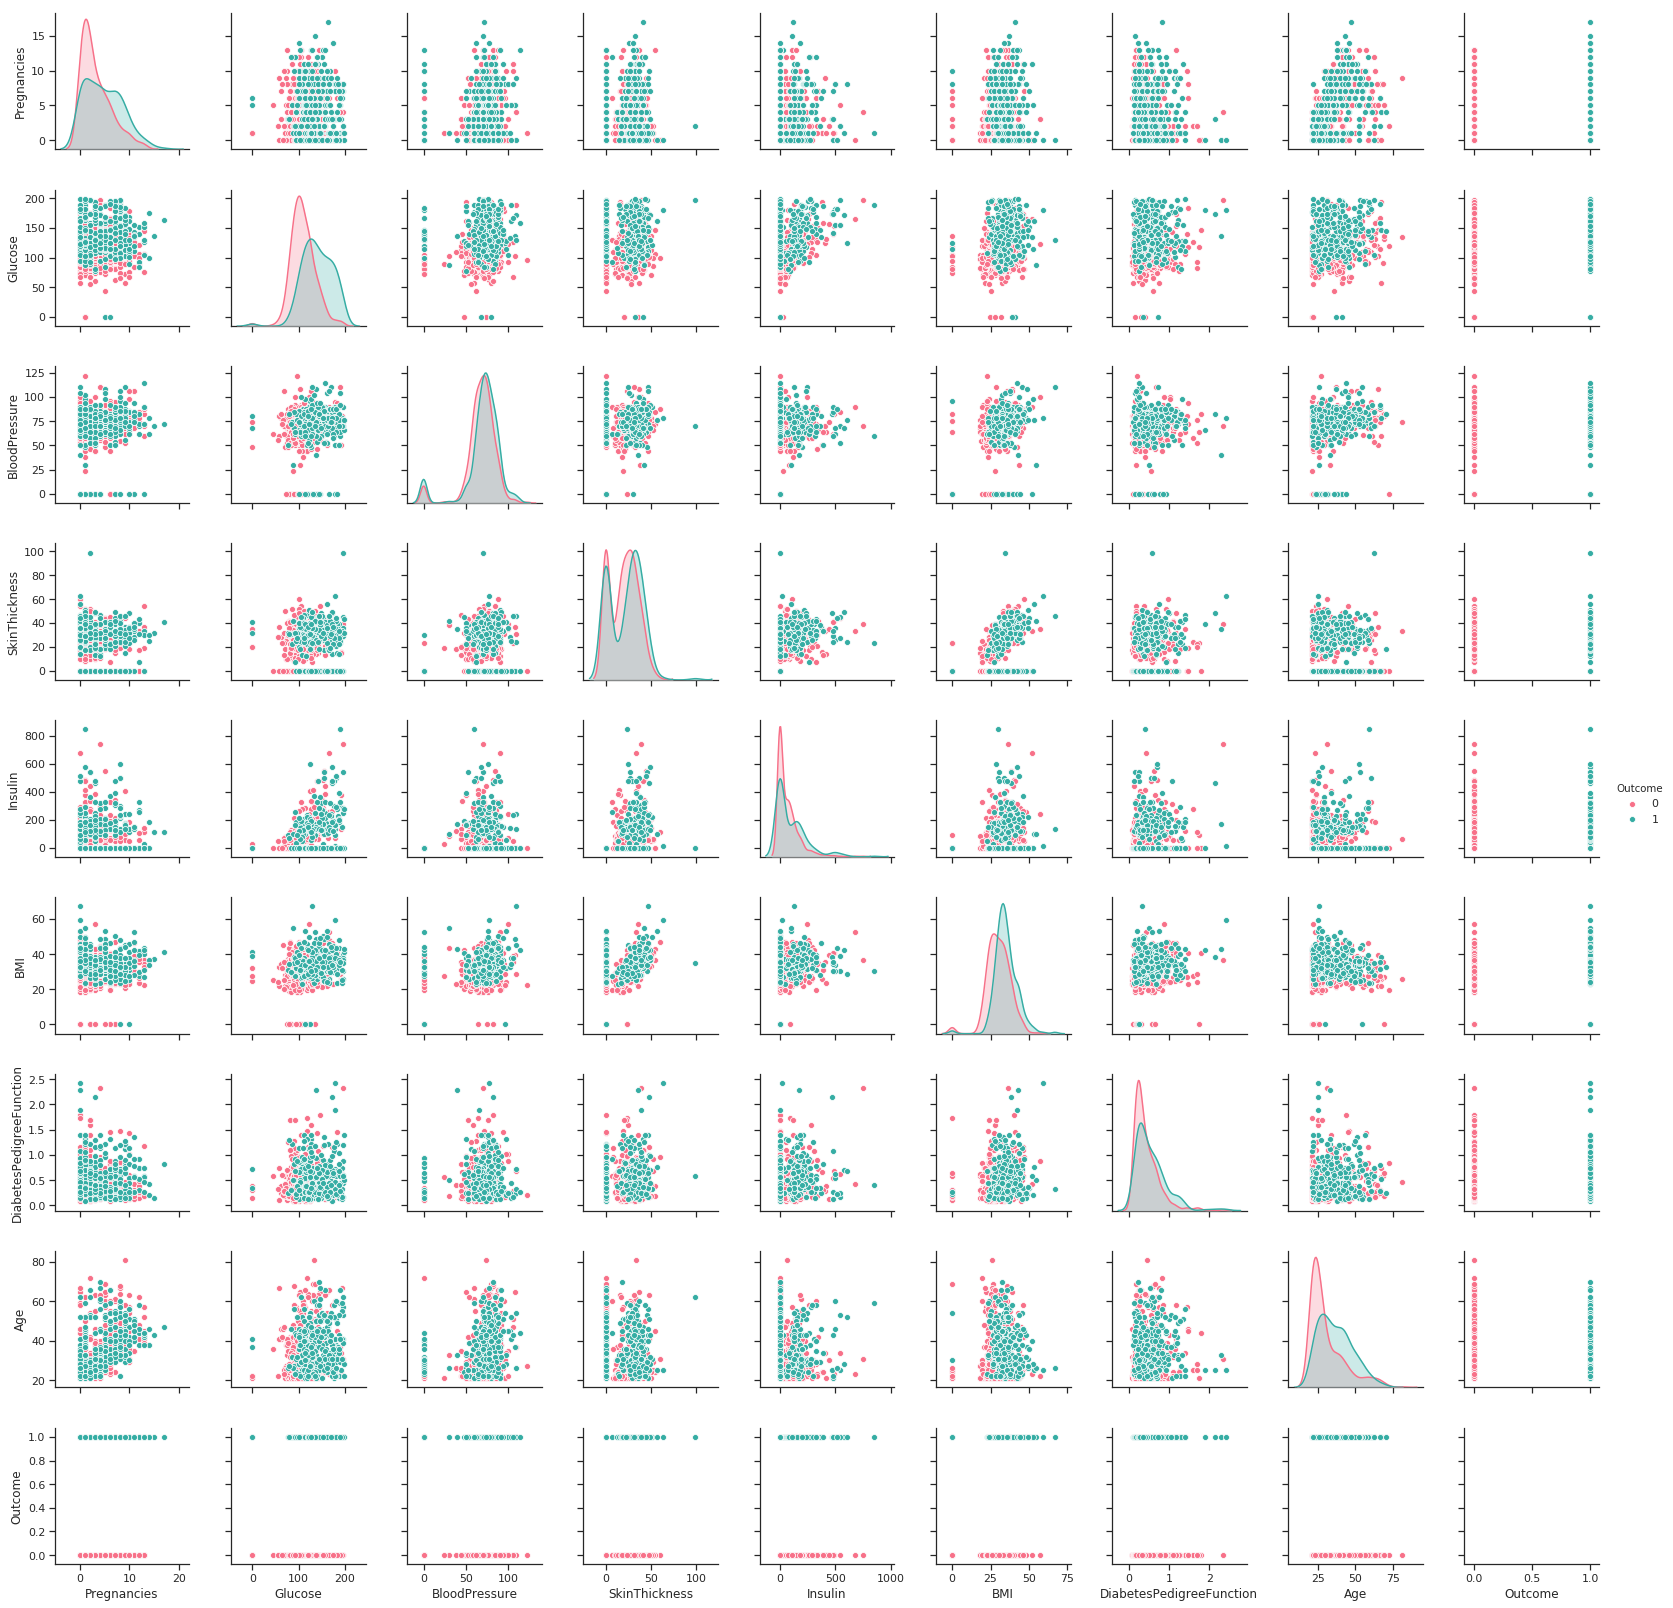

In [10]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(diabetes, hue="Outcome", palette="husl")

We can see that those who do not have diabetes tend to have more children than those who do not have diabetes. Furthermore, glucose levels are more normally distributed and lower for those without diabetes, and there is also a similar pattern with age. 

Upon inspecting the histograms we can see that there are some 0 values for BMI, Blood Pressure and Glucose. These values are of concern because it is biologically impossible to have a BMI of 0, blood pressure of 0 or a glucose reading of 0. This null values are most likely due to missing information or incorrect input during data entry. Lets check to see if there are any other variables with 0 values.

In [11]:
(diabetes == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We can see that for some values like insulin and skin thickness there are a large number of zero values. We can conclude that it is not biologically possible to have a glucose, blood pressure, skin thickness, insulin or BMI reading of zero and we will treat these as missing values to clean.

In order make sure that these 0 values do not negatively impact our models we will transform them into the median for their corresponding value so that it does not cause any errors in our models (such as the logistic model). We do this because if we delete an observation we would be losing valuable information for the other values. 

According to the histogram it looks like there are more people without diabetes than there are with. Lets get the exact numbers.

In [12]:
diabetes.groupby("Outcome").size() #500 (~65%) without, 268 (~35% )with DM

Outcome
0    500
1    268
dtype: int64

It looks like there are 500 (~ 65%) individuals without diabetes (0) and 268 (~ 35%) with diabetes (1). This does not seem to be a minority class however, it is still not an even split of diabetes and non-diabetes. This is important to consider when splitting our data for training and test sets as we could get a lucky split for some models. Because of this we will utilise cross-validation for our training and evaluation to address this and also consider playing with weights for parameter optimization.

Next we will look at correlations to see how each variable correlates with each other and the outcome which can help understand the data and aid in optimising some models.

In [13]:
#Create correlations of our features
corr = diabetes[diabetes.columns].corr()

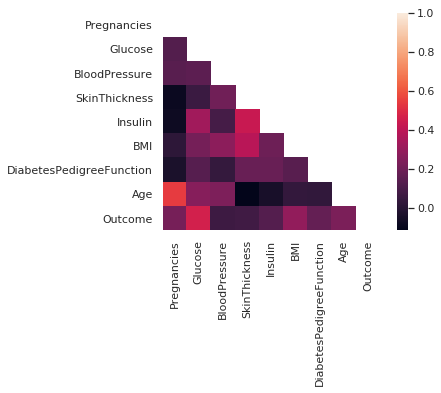

In [14]:
#use a mask to make a one sided heat map
import numpy as np
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
import seaborn as sns
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square = True)

We can see that Glucose, and BMI seem to have the highest correlation with the outcome. Let's see the exact correlations in ascending order.

In [15]:
print(corr['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


## Data cleaning

Remember those zero values for glucose, BMI, blood pressure, skin thickness and insulin? It's time to clean them. 

It has been recommended to use either the mean, median or mode to replace 0 values in machine learning, where the median is less likely to disrupt the distribution (https://towardsdatascience.com/working-with-missing-data-in-machine-learning-9c0a430df4ce). 

Before we clean the data we will split the data into train and test sets. We do this to represent real world scenarios where we do not know anything about new data. This means that we will get the medians for the training set only as we do not know anything about the data in the test set. We will then apply the median from the training set to replace the 0 values in the test set. This means that for any new data we receive in a real world setting we will replace the 0 or missing values with the median of the training set that we have established below.

**Do initial split.**

In [16]:
#convert int to float to stop scaler warnings
diabetes = diabetes.astype(float) 

#split the data into features(X) and outcome(y)
X = diabetes.drop(['Outcome'], axis=1)
y = diabetes[['Outcome']].values

#split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    test_size=0.2,
                                                    random_state=seeds)

#See the size of our train and test sets
print("The number of observations in the training sets are:\t", X_train.shape[0])
print("The number of observations in the test sets are:\t", X_test.shape[0])

The number of observations in the training sets are:	 614
The number of observations in the test sets are:	 154


First, we convert the zero values to Not a Number (NaN). 

In [17]:
features_to_clean = ['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']
for feature in features_to_clean:
    X_train[[feature]] = X_train[[feature]].replace(0, np.nan)
#sanity check 
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
152,9.0,156.0,86.0,28.0,155.0,34.3,1.189,42.0
323,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0
583,8.0,100.0,76.0,NaN,NaN,38.7,0.190,42.0
170,6.0,102.0,82.0,NaN,NaN,30.8,0.180,36.0
262,4.0,95.0,70.0,32.0,NaN,32.1,0.612,24.0


Then we calculate the median values from the training set only.

In [18]:
X_train.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     121.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3615
Age                          29.0000
dtype: float64

In [19]:
#Create a dictionary for medians to apply to test set.
medians = {
    "Glucose": 117.0,
    'BMI':  32.3,
    'BloodPressure':  72.0,
    'SkinThickness':  29.0,
    'Insulin': 121.0
}

Now, we replace the NaN values with the medians for both the training and test sets.

In [20]:
#Convert impossible 0 to nan
features_to_clean = ['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']
for feature in features_to_clean:
    X_train[[feature]] = X_train[[feature]].replace(np.nan, medians[feature])

#sanity check
print("\nCheck zero:\n\n",(X_train == 0).astype(int).sum(axis=0))
print("\nCheck NaN:\n\n", X_train.isnull().sum(axis = 0))


Check zero:

 Pregnancies                 98
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

Check NaN:

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [21]:
#Visual check
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
152,9.0,156.0,86.0,28.0,155.0,34.3,1.189,42.0
323,13.0,152.0,90.0,33.0,29.0,26.8,0.731,43.0
583,8.0,100.0,76.0,29.0,121.0,38.7,0.190,42.0
170,6.0,102.0,82.0,29.0,121.0,30.8,0.180,36.0
262,4.0,95.0,70.0,32.0,121.0,32.1,0.612,24.0


Great! The training set is now clean. We will do the same for test set only replacing the NaN with the medians calculated from the training set.

In [22]:
#Convert impossible 0 to nan
features_to_clean = ['Glucose', 'BMI', 'BloodPressure', 'SkinThickness', 'Insulin']
for feature in features_to_clean:
    X_test[[feature]] = X_test[[feature]].replace(0, np.nan)
#sanity check 
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0.0,105.0,90.0,NaN,NaN,29.6,0.197,46.0
249,1.0,111.0,86.0,19.0,NaN,30.1,0.143,23.0
52,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0
342,1.0,NaN,68.0,35.0,NaN,32.0,0.389,22.0
121,6.0,111.0,64.0,39.0,NaN,34.2,0.260,24.0


In [23]:
#convert Nan to medians from training set
for feature in features_to_clean:
    X_test[[feature]] = X_test[[feature]].replace(np.nan, medians[feature])

#sanity check
print("\nCheck zero:\n\n", (X_test == 0).astype(int).sum(axis=0))
print("\nCheck NaN:\n\n", X_test.isnull().sum(axis = 0))


Check zero:

 Pregnancies                 13
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

Check NaN:

 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [24]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0.0,105.0,90.0,29.0,121.0,29.6,0.197,46.0
249,1.0,111.0,86.0,19.0,121.0,30.1,0.143,23.0
52,5.0,88.0,66.0,21.0,23.0,24.4,0.342,30.0
342,1.0,117.0,68.0,35.0,121.0,32.0,0.389,22.0
121,6.0,111.0,64.0,39.0,121.0,34.2,0.260,24.0


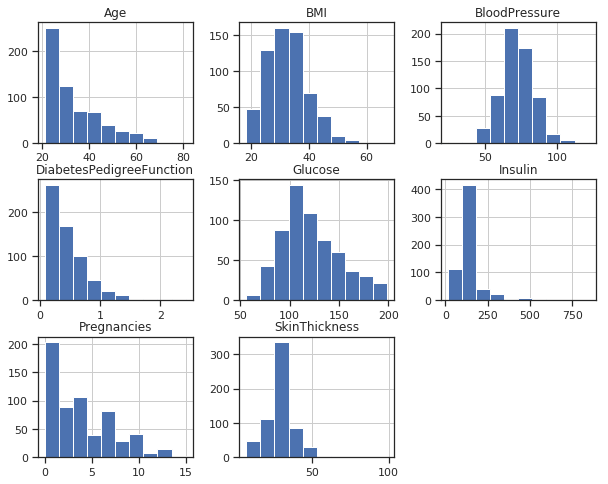

In [25]:
X_train.hist(figsize=(10,8), bins=10)
X_train.plot

That looks a lot better, lets check our BMI and glucose relationship again to double check. 

Looks nice and clean.

### Compute basic general statistics of the data: mean, standard deviation, maximum and minimum values, etcetera.

In [26]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.758958,121.604235,72.623779,29.043974,139.628664,32.442020,0.468464,32.902280
std,3.358495,29.766542,12.079541,8.813808,89.590343,7.069071,0.339454,11.620293
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,65.000000,25.000000,120.000000,27.400000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,121.000000,32.300000,0.361500,29.000000
75%,6.000000,140.000000,80.000000,32.000000,124.250000,36.575000,0.610250,40.000000
max,15.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In order to understand our data I have added some information regarding BMI levels, glucose and insulin levels. 

|BMI | Classification |
|---|---|
|Less than 18.5| `Underweight` |
|18.5–24.9 |`Healthy weight range` |
|25–29.9 | `Overweight` |
|30 and over |`Obese` |

The average BMI is 32.442020, indicating that the average person is 'obese'.

"Fasting blood sugar levels under 100 milligrams/deciliter (mg/dL) are considered normal. Levels between 100 and 125 mg/dL indicate prediabetes. Levels equal to or greater than 126 mg/dL are diagnostic for diabetes." - Healthline

We can see that the average insulin level is 139.628664 which can be considered high.

![title](images/glucose.png)

We can see that the average BMI for this population is 32, which is considered 'Obese' and glucose levels are quite high whereas insulin levels are quite normal. The standard deviations are quite high for glucose, blood pressure, skin thickness and insulin which means that there is large variation for these features whereas the lower standard deviations (for BMI and pregnancies) mean that data points reside closer to their mean.

Now that we have cleaned the data and understand it, lets create some predictive models to see if we can accurately predict diabetes.

# Models 

1. Logistic Regression model with L1-norm Regularization (Lasso).
2. Ensemble tree method using Gradient Boosted Trees (GBT).
3. Support Vector Machine (SVM). 
4. Artificial Neural Network (ANN) with drop-out regularization. 

***

# Evaluation Metrics 

There are many metrics that we can use to measure the performance of our models. These include:

**Accuracy** - the proportion of correct guess of the model compared to the true outcome. Accuracy as a performance metric can be tricky especially for imbalanced datasets.

**Area Under the ROC Curve (AUC)** - which is a performance metric for binary classification (where an area of 1 represents a model that made all predictions perfectly and 0.5 a model that is as good as random). 

**Confusion Matrix** - shows the accuracy in terms of actual versus predicted outcomes and is handy when true positives and false positives are essential to a particular problem. A confusion matrix will be useful in determining the number of correctly guessed diagnosis and can be incredibly important in the health sector in terms of safety for individuals (as diagnosing a patient with diabetes is better than stating they don't and suffering from that misdiagnosis).

**F1 score** - is a measure of accuracy determined from the average of the precision and recall where 1 is the best score.

**Classification Report** - Is a report that shows the precision, recall and f1 score of our model.

**K-folds Cross Validation** - As in train/test splitting processes we can get 'lucky', by utilising a k-folds cross validation we split the data into chunks of 10 and evaluate on different parts of the data to get an overall idea of how well it can generalize. 

The purpose of our model is the determine if someone has diabetes mellitus based on the 8 features given. The AUC is a great metric thanks to its ability to discriminate between positive and negative classes. As the AUC encapsulates sensitivity (true positive rates) and specifity (true negative rates) we will use a cross-validated AUC score as the determinant of our best model, however, we will look at all scores to get an overall feel of model performance before making our decision.

***
# Logistic Regression with L1-norm Regularization (Lasso)

Because the outcome we are predicting is either 0 = does not have DM or 1 = does have DM, it is appropriate to use a classification model such as Ridge or Lasso regression. A logistic regression with Lasso regularisation shrinks the coefficients toward or directly to zero, which is useful for feature selection.**On page 223 in An Introduction to Statistical Learning "lasso tends to outperform ridge regression in terms of bias, variance, and MSE".** Based on this we will use a logistic regression with L1-norm (Lasso) regularization.

Logistic regression works by utilising the maximum likelihood function and aims to find values close to 1 for "Yes/Outcome" or close to 0 for "No/No Outcome.

#### 1. Import the necessary libraries to execute the model.

In [27]:
# Step 1: Import the appropriate libraries
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#### 2. Build the model.
Initialise a scaler to scale the data. This is important because logistic regression with L1 or L2 regularization are scale variant which means that the coefficient estimates are dependant on scaling the features. After this we initialise our logistic regression model and then put these into a pipeline. The pipeline automates the workflow by allowing transformers to be chained together. Data flows from the start of the pipe to its end and every time it is transformed and fed into the next component. We then create a paramter grid with varying parameters to run our search optimizer. After this we run a gridsearchCV which iterates through the parameter grid and pipeline to find the optimal parameters for our dataset based on our scoring method. 

The main parameters for logistic regression are:

**C:** the alpha/C (1/$alpha$) paramter which controls strength of regularisation. I first entered standard C values (0.001, 0.05, 0.1, 1) and then manually fine tuned the parameters to what they are now in the code with 0.185 being the best score. 

**Class weights:** I chose class weights that were based similar to how the outcome was divided. As the data is divided 65(0)/35(1) I tried weights in both directions and fine tuned for what was determined as the best (0:34, 1:66). 

In [28]:
# Run a gridsearchCV to fit a model using the most optimal parameters
#Initialise a scaler to scale the data. 
Scaler = StandardScaler()
Log_Reg = LogisticRegression(penalty = 'l1', random_state=seeds)

# Create a pipeline that runs scaler and model through our gridsearch
pipe = Pipeline([('Transform', Scaler), ('Estimator', Log_Reg)])

# Define our parameter grid
# We test different C values for the inverse of regularization strength
# As the data is slightly imbalanced 65/35 we try different weights
param_grid = {'Estimator__C': [0.183, 0.184, 0.185, 0.1865, 0.187, 0.1875],
              'Estimator__class_weight': [{0:0.9, 1:0.1}, 
                                          {0:0.65, 1:0.35}, 
                                          {0:0.5, 1:0.5}, 
                                          {0:0.34, 1:0.66}, 
                                          {0:0.35, 1:0.65},
                                          {0:0.36, 1:0.64}]}
    
# Initialise the GridSearchCV by passing it the pipeline.
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                           scoring = 'roc_auc', n_jobs=-1)

# Fit our grid-search model to the training set and find the best parameters
grid_search.fit(X_train, y_train.ravel())
print("\nBest parameters: {}".format(grid_search.best_params_))


Best parameters: {'Estimator__C': 0.185, 'Estimator__class_weight': {0: 0.34, 1: 0.66}}


#### 5. Evaluate the model. 
In order to see how our model is performing we first create predictions based on our X_test split from earlier. For this model we can see the accuracy, confusion matrix, classification report and AUC. 

In [29]:
# Step 5: Evaluate our optimal model using metrics and k-folds CV
# Make predictions based on our most optimal model from the gridsearch
y_pred_lr = grid_search.best_estimator_.predict(X_test)

print("\n#####################################################################")

# Accuracy score 
lr_acc = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression accuracy: ", lr_acc)
print("\n#####################################################################")


# Print a confusion matrix to check performance
from sklearn.metrics import confusion_matrix
print("\nOur confusion matrix yields:")
print(confusion_matrix(y_test, y_pred_lr))

print("\n#####################################################################")

# F1-score via classification report
from sklearn.metrics import classification_report
lr_report = classification_report(y_test, y_pred_lr)
print("\nClassification Report:\n", lr_report)
print("\n#####################################################################")


#####################################################################

Logistic Regression accuracy:  0.7727272727272727

#####################################################################

Our confusion matrix yields:
[[71 29]
 [ 6 48]]

#####################################################################

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.71      0.80       100
         1.0       0.62      0.89      0.73        54

   micro avg       0.77      0.77      0.77       154
   macro avg       0.77      0.80      0.77       154
weighted avg       0.82      0.77      0.78       154


#####################################################################


##### Logistic Regression AUC


Area under the curve score is:  0.9044444444444445


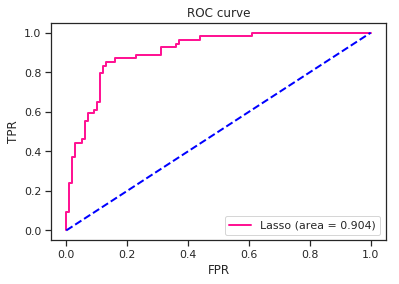

In [30]:
# Finding the AUC
# First create ROC, create y_pred probabilities in order to make fpr and tpr values
y_pred_proba_lr = grid_search.predict_proba(X_test)[:,1]

from sklearn import metrics
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_pred_proba_lr)

# AUC score
lr_auc = metrics.roc_auc_score(y_true = y_test, y_score = y_pred_proba_lr)
print("\nArea under the curve score is: ", lr_auc)

# Plot ROC
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='deeppink', lw=2, label='Lasso (area = {:.3f})'.format(lr_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()


##### K-folds Cross Validation for Lasso
For k-folds cross validation score we choose k=5 because the dataset is relatively small (<1000) and 10 folds takes a long time to execute.

In [31]:
#Evaluate this model with k-folds cross validation auc scores
from sklearn.model_selection import cross_val_score 
lr_auc_scores = cross_val_score(grid_search, X, y.ravel(),
                            cv = 5, scoring  = 'roc_auc', n_jobs=-1)

print("\nAUC score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("\nAverage cross-validation average AUC: {:.4f}".format(lr_auc_scores.mean()))
lr_auc_cv = lr_auc_scores.mean()


AUC score: 0.9044

Average cross-validation average AUC: 0.8293


What did the Lasso model do? In order to find out, we will rebuild the model with the best parameters used above only in order to show the coefficients as grid_search.coef_ will not work. 

In [32]:
print("\nBest parameters: {}".format(grid_search.best_params_))


Best parameters: {'Estimator__C': 0.185, 'Estimator__class_weight': {0: 0.34, 1: 0.66}}


In [33]:
#Rebuild model with optimal parameters to see coefficients
Scaler = StandardScaler()
Scaler.fit(X_train)

#Scale the data because lasso is scale variant
X_train_scaled = Scaler.transform(X_train)
X_test_scaled = Scaler.transform(X_test)

#Create the model based on best parameters from gridsearch
LR = LogisticRegression(C=0.185, class_weight={0: 0.34, 1: 0.66},
                        penalty='l1', random_state=seeds)
LR.fit(X_train_scaled, y_train.ravel())

# Make a Data Frame from the regression coefficients
df_coef = pd.DataFrame(LR.coef_, columns = X_train.columns.values)
display(df_coef)

# Find where the regression coefficients are non-zero
locations = np.where(LR.coef_ != 0)
locations

print(X_train.columns[locations[1]])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.306477,0.876904,0.0,0.051147,0.0,0.43571,0.147981,0.095587


Index(['Pregnancies', 'Glucose', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


We can see here that the lasso model has shrunk the coefficients for Blood Pressure, and insulin to 0. We can also see that the features included are the most important for this model with the highest showing the most importance (Glucose). Here we can see that Glucose, BMI, Pregnancies, DPF and Age  and skin thickness are all useful features for the Lasso model. 

The model has performed well with an AUC of 0.904 and a cross-vaidated AUC of 0.829.

***

# Tree‐based Model
## Gradient Boosted Trees
For Tree-based ensemble methods we can perform either a gradient boosted tree (GBT) or random forest (RF). GBT (high bias, low variance) builds one at a time where each new tree helps to correct errors made by a previously trained one and is great for anomaly detection with unbalanced datasets. RF (low bias, high variance) trains every tree individually using a random sample of the data and is less likely to overfit due to the random nature of the model. 

"It has been shown that GBM performs better than RF if parameters are tuned carefully" ( Ravanshad, https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80 ). Based on this premise we will build a gradient boosted tree model.

#### 1. Import the libraries.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

#### 2. Grow ensemble with optimal parameters from gridsearchCV.
I experimenting with the number of estimators and the learning rates for the GBT. My initial estimates were based on an article I read about optmizing GBT parameters (https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/). 

**Max depth:** The max depth I chose were centered around the standard of 3 of which I found 5 to be the best.

**Number of estimators:** The number of estimators I chose are linked to the standard (100) where the article says that we should adjust the number of estimators in relation to the learning rate (if learning rate gets smaller, we increase the number of estimators).

**Learning rate:** I began with a learning rate of 0.01 - 0.2 and fine tuned my way to the learning rate in the grid now.

I also found the the optimal number of estimators was 150 and the method for the max features were **sqrt**.

In [35]:
# Initialise gradient boosted tree model with a random state for replicability
gbt = GradientBoostingClassifier(random_state=seeds)

# Create a parameter grid to test different learning rates to see which one 
# is best via the search. I tried adding max_features but it made the model worse. 
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.04, 0.051, 0.07,
                                0.08, 0.09, 0.1],
             'max_depth': [2,3,4,5],
             'max_features': ['auto', 'sqrt', 'log2']}

# Run the grid search using our model and parameter grid
grid_search = GridSearchCV(gbt, param_grid=param_grid, cv=5, scoring = 'roc_auc', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train.ravel())
print("\nBest parameters: {}".format(grid_search.best_params_))


Best parameters: {'learning_rate': 0.08, 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 150}


#### 3. Evaluate.

In [36]:
# Make predictions using our best gbt model
y_pred_tree = grid_search.predict(X_test)

# Accuracy score 
tree_acc = accuracy_score(y_test, y_pred_tree)
print("\n#####################################################################")
print("\nGBT accuracy: ", tree_acc)
print("\n#####################################################################")

#Create a confusion matrix
tree_cm = confusion_matrix(y_true = y_test, y_pred = y_pred_tree)
print("\nOur confusion matrix yields: ")
print(tree_cm)
print("\n#####################################################################")

#Classification report
gbt_report = classification_report(y_test, y_pred_tree)
print("\nClassification Report:\n", gbt_report)
print("\n#####################################################################")


#####################################################################

GBT accuracy:  0.7922077922077922

#####################################################################

Our confusion matrix yields: 
[[87 13]
 [19 35]]

#####################################################################

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       100
         1.0       0.73      0.65      0.69        54

   micro avg       0.79      0.79      0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154


#####################################################################


##### Gradient Boosted Tree AUC


Area under the curve score is:  0.8779629629629631


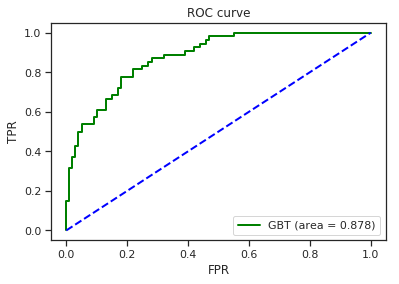

In [37]:
# First create ROC, create y_pred probabilities in order to make fpr and tpr values
y_pred_proba_tree = grid_search.predict_proba(X_test)[:,1]

from sklearn import metrics
fpr_tree, tpr_tree, thresholds = metrics.roc_curve(y_test, y_pred_proba_tree)

#AUC score
tree_auc = metrics.roc_auc_score(y_true = y_test, y_score = y_pred_proba_tree)
print("\nArea under the curve score is: ", tree_auc)

#plot ROC
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='GBT (area = {:.3f})'.format(tree_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

#### K-folds Cross Validation for Gradient Boosted Trees

In [38]:
#K-folds cross validation for auc scores
from sklearn.model_selection import cross_val_score 
gbt_auc_scores = cross_val_score(grid_search, X, y.ravel(), cv = 5,
                                 scoring  = 'roc_auc', n_jobs=-1)

print("\nAUC score: {:.4f}".format(grid_search.score(X_test, y_test)))
print("\nAverage cross-validation AUC score: {:.4f}".format(gbt_auc_scores.mean()))
gbt_auc_cv = gbt_auc_scores.mean()

print("\n#####################################################################")


AUC score: 0.8780

Average cross-validation AUC score: 0.8362

#####################################################################


We have a pretty high AUC score of 0.878 and a cross-validated AUC of 0.836 which is not quite as good as the lasso model. The question is though, what did the GBT do? In order to show how the GBT made each tree one at a time we can look at how it represents the features in the dataset.

In [39]:
print("\nBest parameters: {}".format(grid_search.best_params_))


Best parameters: {'learning_rate': 0.08, 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 150}


In [40]:
# Rebuild tree model in order to find features
gbt = GradientBoostingClassifier(learning_rate=0.08, max_depth=2,
                                 max_features='sqrt',
                                 n_estimators=150,
                                 random_state=seeds)
gbt.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.08, loss='deviance', max_depth=2,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              n_iter_no_change=None, presort='auto', random_state=61,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [41]:
#Create plot feature importance function 
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

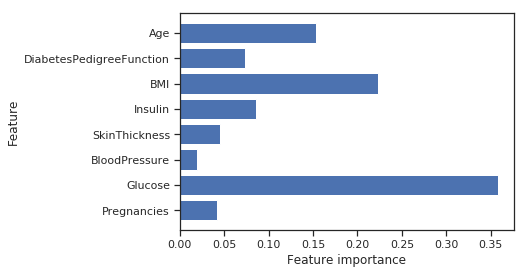

In [42]:
plot_feature_importances(gbt)

We can see that the GBT placed glucose as the most important followed by BMI. This indicating that glucose plays an important role in determining whether someone may have diabetes for this model. Notice however that the order of importance is slightly different for the GBT than it was for the Lasso model which shows how the models differ.

***

# Support Vector Machine

Support Vector Machines (SVM) can be used for both classification and regression but are mostly used for classification. The models utilise separation using an optimal hyperplane which categorizes new samples and are useful for unbalanced datasets and anomaly detection.

Now we will create an SVM for the pima diabetes dataset using these steps:

#### 1. Import the libraries

In [43]:
from sklearn.svm import *
from sklearn.model_selection import RandomizedSearchCV

#### 2. Create our SVM with optimal parameters using random search.

**Kernel:** I decided to experiment first with the different kernel parameters. The kernels represent different mathematical functions that take the data and transform it into one of the forms. As the kernels all have different characteristics I thought it was necessary to use them all. 

**C:** I tested various levels of C regularization and gamma numbers starting from low to high numbers and fine tuning them aswell to see if they could increase overall performance. I started with svc_C : [1, 10, 100, 1000] and found 1 was the best and the re-ran closer c values around 1 and there was no change.

**Gamma:** I also played with gamma scores closer to 1/120 even up to 1/119 and 1/121 and still found 1/120 as the best gamma score. 

**Degree:** I also included the 'degree' which only applies to the 'poly' kernel where the default is 3. I found that 2 is returned as the best however because the rbf function performed the best I removed the degree from the grid to save time when running the search.

In [44]:
#Because SVMs are scale variant we need to scale the data
#initialise a scaler to scale the data
scaler = StandardScaler()

#initialise SVC for pipeline
svc = SVC(probability=True, random_state=seeds)

#create estimator based on pipeline to run through search
estimator = Pipeline([('scaler', scaler), ('svc', svc)])

#fit estimator to training set 
estimator.fit(X_train, y_train.ravel())

#Create a parameter grid which runs through the grid search engine
tuned_parameters = {
    'svc__kernel': ['linear', 'rbf', 'poly'], 
    'svc__C': [0.5, 1, 1.5, 2], 
    'svc__gamma':  [1/30, 1/60, 1/120], 
    'svc__degree': [2, 3]
}

#Run the grid search engine on the estimaor and parameter distribution
grid_search = GridSearchCV(estimator, tuned_parameters, cv=5, n_jobs=-1, scoring='roc_auc')

#fit the model to the training set
grid_search.fit(X_train, y_train.ravel())
print("\nBest parameters: {}".format(grid_search.best_params_))


Best parameters: {'svc__C': 2, 'svc__degree': 2, 'svc__gamma': 0.03333333333333333, 'svc__kernel': 'rbf'}


#### 3. Evaluate.

In [45]:
# Make predictions based on best estimator from random search
y_pred_svm = grid_search.best_estimator_.predict(X_test)

# Accuracy score 
svm_acc = accuracy_score(y_test, y_pred_svm)
print("\n#####################################################################")
print("\nSVM accuracy: ", svm_acc)
print("\n#####################################################################")

# Create the confusion matrix
svm_cm = confusion_matrix(y_true = y_test, y_pred = y_pred_svm)
print("\nOur confusion matrix yields: ")
print(svm_cm)
print("\n#####################################################################")

#Classification report
svm_report = classification_report(y_test, y_pred_svm)
print("\nClassfication Report:\n", svm_report)
print("\n#####################################################################")


#####################################################################

SVM accuracy:  0.8441558441558441

#####################################################################

Our confusion matrix yields: 
[[93  7]
 [17 37]]

#####################################################################

Classfication Report:
               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       100
         1.0       0.84      0.69      0.76        54

   micro avg       0.84      0.84      0.84       154
   macro avg       0.84      0.81      0.82       154
weighted avg       0.84      0.84      0.84       154


#####################################################################


##### Support Vector Machine AUC


Area under the curve score is:  0.9122222222222223


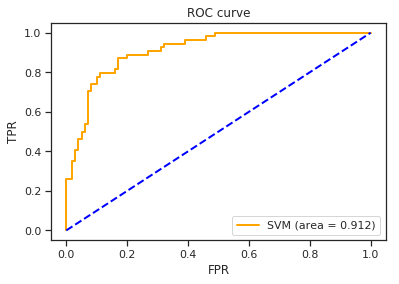

In [46]:
# Finding the AUC
# First create ROC, create y_pred probabilities in order to make fpr and tpr values
y_pred_proba_svm = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

from sklearn import metrics
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(y_test, y_pred_proba_svm)

#Calculate our AUC for the SVM
svm_auc = metrics.roc_auc_score(y_true = y_test, y_score = y_pred_proba_svm)
print("\nArea under the curve score is: ", svm_auc)

#plot ROC
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = {:.3f})'.format(svm_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

##### K-folds Cross Validation for Support Vector Machine

In [47]:
#K-folds cross validation 
from sklearn.model_selection import cross_val_score 
svm_auc_scores = cross_val_score(grid_search, X, y.ravel(), cv = 5,
                                 scoring  = 'roc_auc', n_jobs=-1)

print("\nAUC score: {:.4f}".format(grid_search.score(X_test, y_test.ravel())))
print("\nAverage cross-validation AUC score: {:.4f}".format(svm_auc_scores.mean()))
svm_auc_cv = svm_auc_scores.mean()

print("\n#####################################################################")


AUC score: 0.9122

Average cross-validation AUC score: 0.8371

#####################################################################


Our SVM model has scored an impressive 0.909 which is the highest so far! This demonstrates how powerful SVM's are for classification especially for datasets where the outcomes are not evenly split.  
***

# Artificial Neural Network

An Artificial Neural Network (ANN) learn from the data and progressively improves performance. 

At first, I did try using a grid search to find optimal parameters thanks to an article from machinelearningmastery.com however, it still did not beat my original model that I fine tuned myself (https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/) and took a long time to run. Therefore, I went a different direction with optimizing the ANN, by dividing the training data into train and dev sets. This way I could optimize my model on the smaller training set and evaluate on the dev sets. Finally, once I manually optimized my model to the best results I would then run the optimized model on train+dev (original training set) and evaluate it on the test set. The process is as follows.

#### 1. Import necessary libraries.

In [48]:
#### TRAIN ON DEV
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy

# fix random seed for reproducibility
numpy.random.seed(seeds)
set_random_seed(seeds)

Using TensorFlow backend.


#### 2. Set global parameters for our ANN.
**Hidden layers:** I chose these hidden layers because I read somewhere that if we have 2 hidden layers, the rule of thimb is that the first hidden layer (H1) is n/2 and the second hidden layer (H2) is the first H1 divided by 2. I realised however, that choosing one hidden layer actually led to better results compared to two (after optimizing my node size). I ended up choosing a node size a lot smaller than suggested out of experimentation and my results improved drastically from 74 to 80.

**Activation type:** I tried running a model with sigmoid first and relu second and various other activations and found an interesting article that found 'selu' for the first activation and 'sigmoid' for the last activation to yield the best scores (https://towardsdatascience.com/is-relu-after-sigmoid-bad-661fda45f7a2). After reading this I tried it and found my AUC for ANN increased from 80 to 81. 

**Optimizer/Learning rate:** I also tried different learning rates which effects the weights and biases. I found that 0.001 (default) gave the best result.

I kept decay, momentum and nesterov to the default parameters set in the keras optimizers documentation. 

In [49]:
#hidden layer node size
H1 = 8 
#only tuned learning rate for sgd optimizer
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True) 

#### 3. Split the data into train, dev and test.
This is because when we run our ANN model that we created each epoch is tested using the validation data.

In [50]:
X_train_ann, X_dev_ann, y_train_ann, y_dev_ann = train_test_split(X_train, y_train,
                                                                  random_state=seeds)
#See the size of our train and test sets
print("The number of observations in the training sets are:\t", X_train_ann.shape[0])
print("The number of observations in the dev sets are:\t\t", X_dev_ann.shape[0])

The number of observations in the training sets are:	 460
The number of observations in the dev sets are:		 154


#### 4. Build our model.

In [51]:
# fix random seed for reproducibility
numpy.random.seed(seeds)
set_random_seed(seeds)

# Fit scaler to the training data only
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_ann)

# create model
model = Sequential()
model.add(Dense(H1, input_dim=8, activation='selu')) #hidden layer with optimized size
model.add(Dense(1, activation='sigmoid'))

# Compile model using tuned optimizer
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fit the model on the smaller training sets
model.fit(scaler.transform(X_train_ann), y_train_ann, epochs=150, batch_size=10, verbose=0)

# evaluate the model on the dev sets
scores = model.evaluate(scaler.transform(X_dev_ann), y_dev_ann)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

154/154 [==============================] - 0s 542us/step

acc: 74.03%


#### 5. Evaluate test model

In [52]:
# Make predictions based on best estimator from random search
y_pred_ann = model.predict(scaler.transform(X_dev_ann)) #prob predictions
y_pred_ann_class = model.predict_classes(scaler.transform(X_dev_ann), verbose=0) #binary predictions

#### Testing scores


#####################################################################

ANN test accuracy:  0.7402597402597403

#####################################################################

Our test confusion matrix yields: 
[[81 10]
 [30 33]]

#####################################################################

Classfication Report for test:
               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80        91
         1.0       0.77      0.52      0.62        63

   micro avg       0.74      0.74      0.74       154
   macro avg       0.75      0.71      0.71       154
weighted avg       0.75      0.74      0.73       154


#####################################################################

Our testing AUC for ann is:  0.8107448107448108


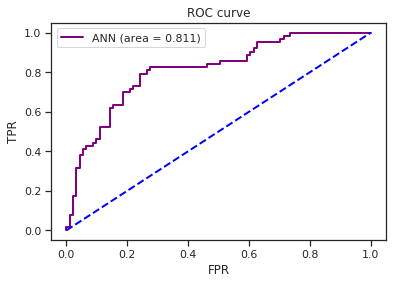


#####################################################################


In [53]:
# Accuracy score 
ann_acc = accuracy_score(y_dev_ann, y_pred_ann_class)
print("\n#####################################################################")
print("\nANN test accuracy: ", ann_acc)
print("\n#####################################################################")

# Create the confusion matrix
ann_cm = confusion_matrix(y_true = y_dev_ann, y_pred = y_pred_ann_class)
print("\nOur test confusion matrix yields: ")
print(ann_cm)
print("\n#####################################################################")

#Classification report
ann_report = classification_report(y_dev_ann, y_pred_ann_class)
print("\nClassfication Report for test:\n", ann_report)
print("\n#####################################################################")

#Calculate AUC score
from sklearn.metrics import roc_auc_score
ann_auc = roc_auc_score(y_dev_ann, y_pred_ann)
print("\nOur testing AUC for ann is: ", ann_auc)

from sklearn.metrics import roc_curve
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_dev_ann, y_pred_ann)

# Plot AUC 
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='purple', lw=2, label='ANN (area = {:.3f})'.format(ann_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("\n#####################################################################")

#### 6. Apply final model on train+dev and evaluate on test set. 

In [54]:
# fix random seed for reproducibility
numpy.random.seed(seeds)
set_random_seed(seeds)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# create model
model = Sequential()
model.add(Dense(H1, input_dim=8, activation='selu')) #use optimized hidden layer size
#model.add(Dense(H2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) #with optimized optimizers

# Fit the model
model.fit(scaler.transform(X_train), y_train, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(scaler.transform(X_test), y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

154/154 [==============================] - 0s 646us/step

acc: 83.77%


#### 7. Evaluate.

In [55]:
# Make predictions based on best estimator from random search
y_pred_ann = model.predict(scaler.transform(X_test)) # prob predictions
y_pred_ann_class = model.predict_classes(scaler.transform(X_test), verbose=0) #binary predictions

#### Final Artificial Neural Network scores

In [56]:
# Accuracy score 
ann_acc = accuracy_score(y_test, y_pred_ann_class)
print("\n#####################################################################")
print("\nANN accuracy: ", ann_acc)
print("\n#####################################################################")

# Create the confusion matrix
cm_ann = confusion_matrix(y_true = y_test, y_pred = y_pred_ann_class)
print("\nOur confusion matrix yields: ")
print(cm_ann)
print("\n#####################################################################")

#Classification report
print("\nClassfication Report:\n", classification_report(y_test, y_pred_ann_class))
print("\n#####################################################################")


#####################################################################

ANN accuracy:  0.8376623376623377

#####################################################################

Our confusion matrix yields: 
[[90 10]
 [15 39]]

#####################################################################

Classfication Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       100
         1.0       0.80      0.72      0.76        54

   micro avg       0.84      0.84      0.84       154
   macro avg       0.83      0.81      0.82       154
weighted avg       0.84      0.84      0.84       154


#####################################################################


##### Artificial Neural Network  AUC


Our AUC for ann is:  0.9087037037037038


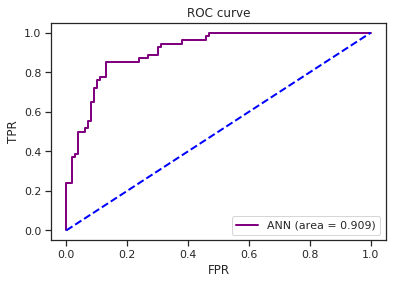

In [57]:
#Calculate AUC score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
ann_auc = roc_auc_score(y_test, y_pred_ann)
print("\nOur AUC for ann is: ", ann_auc)

from sklearn.metrics import roc_curve
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)

# Plot AUC
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_ann, tpr_ann, color='purple', lw=2, label='ANN (area = {:.3f})'.format(ann_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

##### K-fold Cross Validation for AUC (Manual)
Because we cannot simply run a kfold crossvalidation on a keras model, I had to manually create one using kfold split from scikit learn. The procedure runs the specified

In [58]:
# define 5-fold cross validation test harness
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=61)
ann_cv_scores = []

#Run loop for manual 5-fold cross validation
for train, test in kfold.split(X, y):
    #scale data
    scaler = StandardScaler()
    #fit on training
    scaler.fit(X.iloc[train])
    #build model with optimized parameters
    model = Sequential()
    model.add(Dense(H1, input_dim=8, activation='selu')) #use optimized hidden layer size
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) #with optimized optimizers
    # Fit the model
    model.fit(scaler.transform(X.iloc[train]), y[train], epochs=150, batch_size=10, verbose=0)
    y_pred_ann = model.predict(scaler.transform(X.iloc[test]))
    scores = roc_auc_score(y[test], y_pred_ann)
    ann_cv_scores.append(scores)

ann_auc_cv = numpy.mean(ann_cv_scores)
print("ANN CV score: ", ann_auc_cv)

print("\n#####################################################################")

ANN CV score:  0.8338825995807128

#####################################################################


The AUC looks great! A lot higher than the testing model. This is because ANN performs better with more observations to learn on and we have a cross-vaidated AUC of 0.834. Looks like the SVM and ANN are the top two models for AUC score and SVM and GBT are highest for cross-validated AUC scores. 
***
## Conclusions
In order to determine what model is best, lets have a look at the performance of our models.

#### Accuracy

In [68]:
# Print accuracy scores for our models
print("Accuracy:")
print("1. Lasso AUC:\t\t\t\t", lr_acc)
print("2. Gradient Boosted Tree AUC:\t\t", tree_acc)
print("3. Support Vector Machine AUC:\t\t", svm_acc)
print("4. Artificial Neural Network AUC:\t", ann_acc)

Accuracy:
1. Lasso AUC:				 0.7727272727272727
2. Gradient Boosted Tree AUC:		 0.7922077922077922
3. Support Vector Machine AUC:		 0.8441558441558441
4. Artificial Neural Network AUC:	 0.8376623376623377


We can see that the SVM has the highest accuracy, following the ANN, GBT and finally Lasso. As mentioned before, accuracy is not the best measure of performance and generalization especially for imbalanced datasets.

##### AUC

In [60]:
# Print AUC scores for our models
print("AUC performance:")
print("1. Lasso AUC:\t\t\t\t", lr_auc)
print("2. Gradient Boosted Tree AUC:\t\t", tree_auc)
print("3. Support Vector Machine AUC:\t\t", svm_auc)
print("4. Artificial Neural Network AUC:\t", ann_auc)

AUC performance:
1. Lasso AUC:				 0.9044444444444445
2. Gradient Boosted Tree AUC:		 0.8779629629629631
3. Support Vector Machine AUC:		 0.9122222222222223
4. Artificial Neural Network AUC:	 0.9087037037037038


We can see that the SVM also has the highest AUC score, followed by ANN, Lasso and finally the GBT model. However, the AUC provided were calculated on one split of the data for training and test and a k-folds cross validation score is a more appropriate measure for performance and generalization.

##### K-folds AUC 

In [61]:
# Print CV AUC scores for our models
print("K-fold CV AUC performance:")
print("1. Lasso AUC:\t\t\t\t", lr_auc_cv)
print("2. Gradient Boosted Tree AUC:\t\t", gbt_auc_cv)
print("3. Support Vector Machine AUC:\t\t", svm_auc_cv)
print("4. Artificial Neural Network AUC:\t", ann_auc_cv)

K-fold CV AUC performance:
1. Lasso AUC:				 0.8292620545073375
2. Gradient Boosted Tree AUC:		 0.8361740041928721
3. Support Vector Machine AUC:		 0.8370901467505242
4. Artificial Neural Network AUC:	 0.8338825995807128


The scores are now a lot more closer, with SVM again having the highest score, followed by GBT, ANN and finally Lasso. We can layer the AUC scores together to see how they models compare.


####################### Combined AUC scores #########################


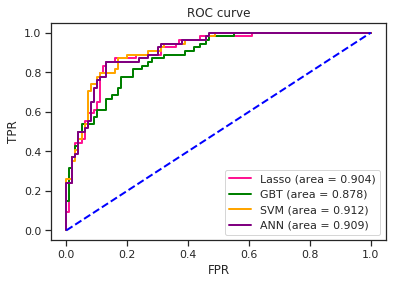


####################### Close up #####################################


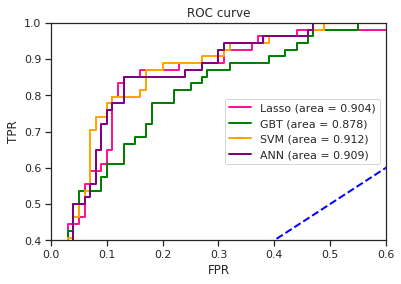


#####################################################################


In [62]:
print("\n####################### Combined AUC scores #########################")       

#Plot AUC for all models
plt.figure(1)
plt.plot(fpr_lr, tpr_lr, color='deeppink', lw=2, label='Lasso (area = {:.3f})'.format(lr_auc))
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='GBT (area = {:.3f})'.format(tree_auc))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = {:.3f})'.format(svm_auc))
plt.plot(fpr_ann, tpr_ann, color='purple', lw=2, label='ANN (area = {:.3f})'.format(ann_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

print("\n####################### Close up #####################################")

#Plot Zoomed in AUC for greater inspection
plt.figure(2)
plt.xlim(0, 0.6)
plt.ylim(0.4, 1)
plt.plot(fpr_lr, tpr_lr, color='deeppink', lw=2, label='Lasso (area = {:.3f})'.format(lr_auc))
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='GBT (area = {:.3f})'.format(tree_auc))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = {:.3f})'.format(svm_auc))
plt.plot(fpr_ann, tpr_ann, color='purple', lw=2, label='ANN (area = {:.3f})'.format(ann_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("\n#####################################################################")

### What is the best model? 

All of our models performed similar to each other, ranging from 0.878 - 0.912. The best performing models based on AUC score from highest to lowest are:

1. SVM (0.912)
2. ANN (0.909)
2. Lasso (0.904)
3. GBT (0.878)

However, when we look at the k-fold cross validated scores, performance is much closer than we first thought and in a different order. 

1. SVM (0.837)
2. GBT (0.836)
3. ANN (0.832)
4. Lasso (0.829)

Because cross-vaidation is more a more stable and generalizable method of evaluating a model we will base our decision on the cross-validated AUC scores. Based on both AUC and cross validated AUC scores alone, the **SVM** is the better model, but lets delve deeper before we make a final decision.

Each model makes its predictions using different techniques. In order to see if there is a greater difference in the top two models we can break them down with the other metrics we have gathered.

**Confusion matrix**

In [63]:
#Create a nice confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

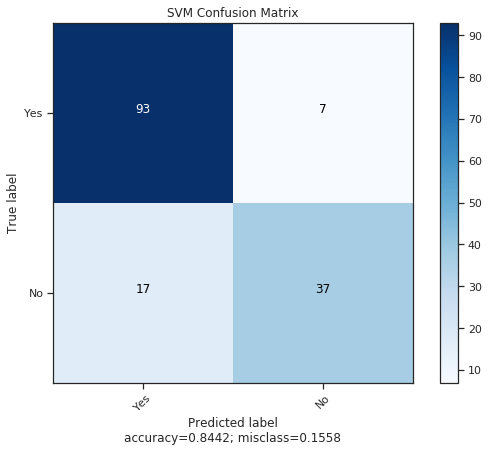

In [64]:
plot_confusion_matrix(svm_cm, 
                      normalize    = False,
                      target_names = ['Yes', 'No'],
                      title        = "SVM Confusion Matrix")

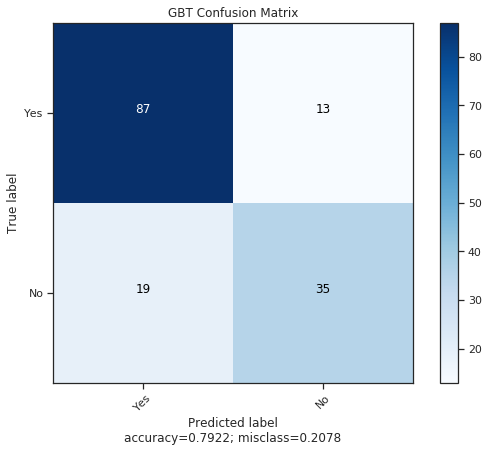

In [65]:
plot_confusion_matrix(tree_cm, 
                      normalize    = False,
                      target_names = ['Yes', 'No'],
                      title        = "GBT Confusion Matrix")

The purpose of our models is to predict diabetes in patients. For this particular circumstance, we would rather have patients diagnosed with diabetes even if they did not have it (false positives), instead of saying a person does not have diabetes when in fact they do (false negative). When comparing both models, we can see that the SVM model produces more true positives (93 vs 87) and fewer false positives than the GBT (17 vs 19). We can see that the SVM has fewer false negatives (7 vs 13) and more true negatives (37 vs 35). This gives more precedence towards the SVM model for these circumstances. 

**Classification reports**

To gain further insight we can also analyse the classification reports for our models.  

In [66]:
# Show classification report for SVM 
print(svm_report)

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       100
         1.0       0.84      0.69      0.76        54

   micro avg       0.84      0.84      0.84       154
   macro avg       0.84      0.81      0.82       154
weighted avg       0.84      0.84      0.84       154



In [67]:
# Show classification report for ANN 
print(gbt_report)

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       100
         1.0       0.73      0.65      0.69        54

   micro avg       0.79      0.79      0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



A useful measure of success of prediction when classes are imbalanced is Precision-Recall. Upon inspecting the classfication reports, we can see that the SVM model has higher precision and recall for both diabetes and no diabetes classification. Finally we can see that that the SVM produced a higher F1 score both weighted (micro) and un-weighted (macro). The micro f1 score is important here as our outcomes were not divided evenly (50/50) rather 65/35. Here we can see that the F1 micro is 0.05 higher and the other F1 scores are higher in general providing more evidence that SVM has performed better than the GBT. 

#### Final remarks 
Based on our performance metrics, the SVM sored the highest accuracy, AUC and 5-fold cross-validated AUC. Upon analysing these scores including the confusion matrix and classficiation report, we can conclude that the **SVM** is the best model for predicting whether an individual would develop diabetes mellitus within fives years given the values of the eight inputs. 

**By Phillip Hungerford (z5037298)**